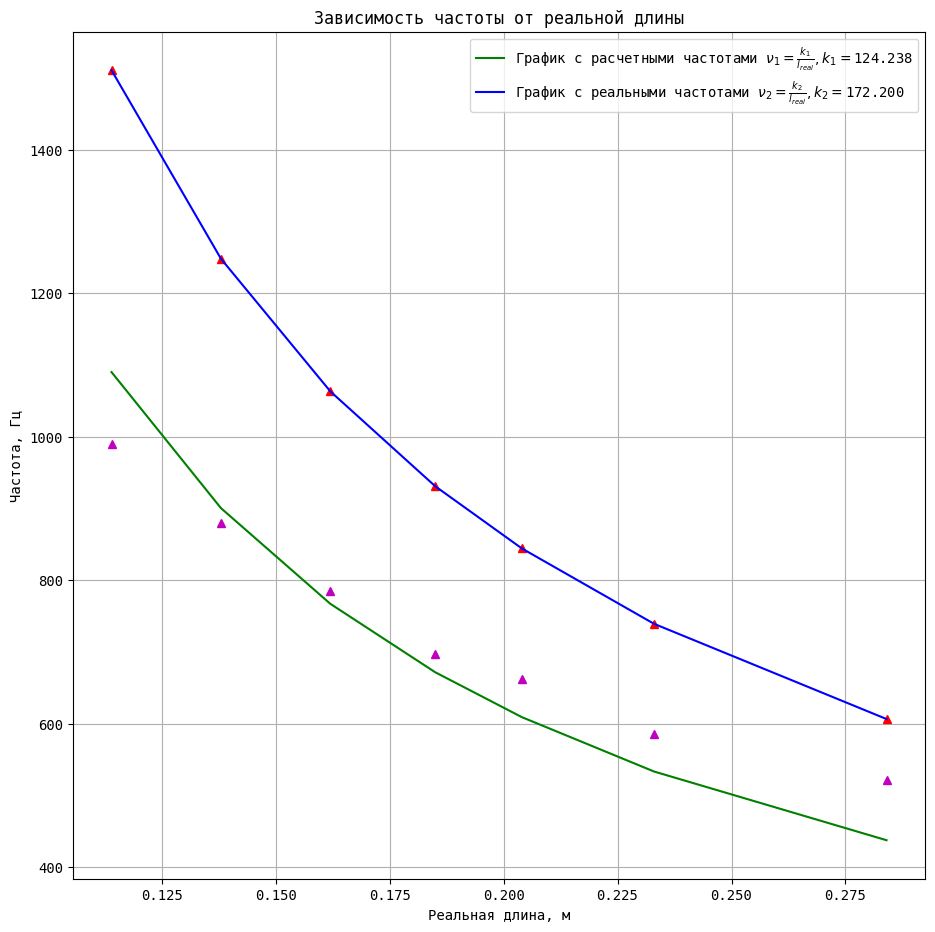

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt                     #include libs
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex
import numpy as np

plt.rcParams["font.family"] = "monospace"

def mapping(x, k):                #Function of approximating give to curve_fit
    return k/x

plt.figure(figsize=(11,11))                                #Create graphic in matplotlib
plt.title(r"Зависимость частоты от реальной длины")
plt.ylabel(r"Частота, Гц")
plt.xlabel(r"Реальная длина, м")

#-------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------

#processing data

x = []
y1 = []
y2 = []

#FILE "data.txt" !!!!!!!!!!!! YOU NEED TO UPLOAD IT TO COLAB

file = open('data.txt', 'r')                 #open file with data
while (line := file.readline()):              # every line have x, y, y1 ...
  s = line.split()
  if (len(s) != 0):
    x.append(float(s[0].replace(',','.')))    #collect in x[] y1[] y2[] with change "," -> "." (if excel)
    y1.append(float(s[1].replace(',','.')))
    y2.append(float(s[2].replace(',','.')))

a1 = 0
a2 = 0
k1 = 0                                        #create coeffs all in function
k2 = 0

coeffs,_ = curve_fit(mapping, x, y1)          #give func and our measurements
k1 = coeffs[0]                                   #it returns array of aproximating coeffs
y1_fit = []
for i in range(len(x)):
  y1_fit.append(k1 / x[i])                    #with coeffs make array of Approximating data
#                 ^
#                 |
#                 function need to write
#                 """"""""""""""""""""""


coeffs,_ = curve_fit(mapping, x, y2)          #give func and our measurements
k2 = coeffs[0]                                   #it returns array of aproximating coeffs
y2_fit = []
for i in range(len(x)):
  y2_fit.append(k2 / x[i])                    #with coeffs make array of Approximating data
#                 ^
#                 |
#                 function need to write
#                 """"""""""""""""""""""


plt.plot(x, y1, 'm^', label='')    #triangles with measurments
plt.plot(x, y1_fit, color = 'g', label = f"График с расчетными частотами " r'$\nu_{1} = \frac{k_{1}}{l_{real}} , k_{1} = $' f"{k1:.3f}") #approximating praphic

plt.plot(x, y2, 'r^', label='')    #triangles with measurments
plt.plot(x, y2_fit, color = 'b', label = f"График с реальными частотами " r'$\nu_{2} = \frac{k_{2}}{l_{real}} , k_{2} = $' f"{k2:.3f}") #approximating praphic

#----------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------

plt.grid(visible = True, which='major', axis='both', alpha=1)           #end of matplotlib
plt.grid(visible = True, which='minor', axis='both', alpha=1)           #show graphic
plt.legend()
plt.show()
plt.savefig('graphic.png')
file.close()